In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)

In [2]:
data=pd.read_csv(r'dataset\healthcare-dataset-stroke-data.csv')

In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory data analysis

In [4]:
data.shape

(5110, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Lets fill Null Values

In [7]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [8]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [9]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [10]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [11]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
data.drop('id',axis=1,inplace=True)

In [13]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Outlier Removation

In [14]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

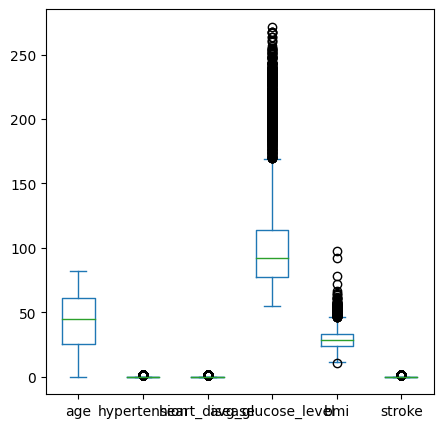

In [15]:
data.plot(kind='box')
plt.show()

# Label Encoding

In [16]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [17]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [18]:
gender=enc.fit_transform(data['gender'])

In [19]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [20]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

In [21]:
data['work_type']=work_type

In [22]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender

In [23]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# Splitting the data for train and test

X ---train_X,test_X  80/20                   
Y ---train_Y,test_Y

In [25]:
X=data.drop('stroke',axis=1)

In [26]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [27]:
Y=data['stroke']

In [28]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [29]:
Y.max()

1

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [31]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3029,0,36.0,0,0,1,2,0,67.29,36.7,1
2277,0,34.0,0,0,1,2,0,83.53,48.5,1
3002,1,60.0,0,0,1,2,0,65.16,30.8,2
246,0,75.0,0,0,1,3,0,78.80,29.3,1
2825,1,76.0,0,0,1,2,1,58.65,25.6,3
...,...,...,...,...,...,...,...,...,...,...
4931,0,53.0,1,0,1,0,0,98.61,38.8,3
3264,0,61.0,0,0,1,2,0,72.01,26.0,1
1653,1,44.0,0,0,1,2,0,94.71,28.4,3
2607,1,21.0,0,0,0,2,1,120.94,29.7,1


In [32]:
Y_train

3029    0
2277    0
3002    0
246     1
2825    0
       ..
4931    0
3264    0
1653    0
2607    0
2732    0
Name: stroke, Length: 4088, dtype: int64

In [33]:
Y_train.max()

1

In [34]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
42,1,82.0,0,1,1,2,1,144.90,26.400000,3
380,1,4.0,0,0,0,4,0,106.22,16.700000,0
3524,1,58.0,0,0,1,2,1,79.95,25.900000,2
352,0,20.0,0,0,0,2,0,96.57,34.100000,2
4927,0,10.0,0,0,0,4,0,69.84,13.700000,0
...,...,...,...,...,...,...,...,...,...,...
472,0,43.0,0,0,1,2,0,75.05,22.900000,3
4446,0,42.0,0,0,1,2,1,191.94,27.900000,2
660,1,52.0,0,0,0,2,0,69.37,36.200000,0
57,1,78.0,0,0,1,2,1,237.75,28.893237,1


In [35]:
Y_test

42      1
380     0
3524    0
352     0
4927    0
       ..
472     0
4446    0
660     0
57      1
2367    0
Name: stroke, Length: 1022, dtype: int64

In [36]:
Y_test.max()

1

# Normalize

In [37]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [38]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [39]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# lets save the scaler object

In [40]:
import pickle
import os


In [41]:
scaler_path=os.path.join('models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [42]:
X_train_std

array([[-0.8361144 , -0.32824306, -0.33206349, ..., -0.86023092,
         0.99513416, -0.35492266],
       [-0.8361144 , -0.41649391, -0.33206349, ..., -0.50170259,
         2.50152031, -0.35492266],
       [ 1.193598  ,  0.73076708, -0.33206349, ..., -0.90725464,
         0.24194108,  0.57814732],
       ...,
       [ 1.193598  ,  0.02476032, -0.33206349, ..., -0.25488321,
        -0.06444255,  1.5112173 ],
       [ 1.193598  , -0.9901244 , -0.33206349, ...,  0.32419302,
         0.10151525, -0.35492266],
       [-0.8361144 ,  0.64251624,  3.01147232, ..., -1.03176818,
         0.5483247 ,  0.57814732]])

In [43]:
X_test_std

array([[ 1.19359800e+00,  1.70152638e+00, -3.32063487e-01, ...,
         8.53154763e-01, -3.19762237e-01,  1.51121730e+00],
       [ 1.19359800e+00, -1.74025658e+00, -3.32063487e-01, ...,
        -7.78468796e-04, -1.55806272e+00, -1.28799263e+00],
       [ 1.19359800e+00,  6.42516237e-01, -3.32063487e-01, ...,
        -5.80737776e-01, -3.83592159e-01,  5.78147322e-01],
       ...,
       [ 1.19359800e+00,  3.77763701e-01, -3.32063487e-01, ...,
        -8.14311033e-01,  9.31304234e-01, -1.28799263e+00],
       [ 1.19359800e+00,  1.52502469e+00, -3.32063487e-01, ...,
         2.90299190e+00, -1.47600169e-03, -3.54922655e-01],
       [-8.36114403e-01, -3.72368483e-01, -3.32063487e-01, ...,
        -5.07442576e-01, -1.16231721e+00, -3.54922655e-01]])

# Training

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [45]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [46]:
dt.feature_importances_

array([0.03146637, 0.17651728, 0.04062196, 0.01495163, 0.01065285,
       0.03533076, 0.04969311, 0.29681135, 0.2720828 , 0.07187189])

In [47]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [48]:
Y_pred_dt=dt.predict(X_test_std) ## X_test_std

In [49]:
Y_pred_dt.max()

1

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
ac_dt=accuracy_score(Y_test,Y_pred_dt)

In [52]:
ac_dt

0.9187866927592955

In [53]:
import joblib
model_path=os.path.join('models/dt.sav')
joblib.dump(dt,model_path)

['models/dt.sav']

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [55]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [56]:
Y_pred_lr=lr.predict(X_test_std)

In [57]:
Y_pred_lr.max()

0

In [58]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)

In [59]:
ac_lr

0.9471624266144814

# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [61]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [62]:
Y_pred_knn=knn.predict(X_test_std)

In [63]:
Y_pred_knn.max()

1

In [64]:
ac_knn=accuracy_score(Y_test,Y_pred_knn)

In [65]:
ac_knn

0.9471624266144814

In [66]:
# import joblib
# model_path=os.path.join('C:/Users/my pc/Desktop/ML/Stroke-Risk-Prediction-using-Machine-Learning-master/','models/knn.sav')
# joblib.dump(knn,model_path)

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [68]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [69]:
Y_pred_rf=rf.predict(X_test_std)

In [70]:
Y_pred_rf.max()

1

In [71]:
ac_rf=accuracy_score(Y_test,Y_pred_rf)

In [72]:
ac_rf

0.9461839530332681

In [73]:
ac_knn

0.9471624266144814

In [74]:
ac_dt

0.9187866927592955

In [75]:
ac_lr

0.9471624266144814

# SVM

In [76]:
from sklearn.svm import SVC

In [77]:
sv=SVC()

In [78]:
sv.fit(X_train_std,Y_train)

SVC()

In [79]:
Y_pred_sv=sv.predict(X_test_std)

In [80]:
Y_pred_sv.max()

0

In [81]:
ac_sv=accuracy_score(Y_test,Y_pred_sv)

In [82]:
ac_sv

0.9471624266144814

In [83]:
ac_lr

0.9471624266144814

# Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
gb = GradientBoostingClassifier()

In [86]:
gb.fit(X_train_std,Y_train)

GradientBoostingClassifier()

In [87]:
Y_pred_gb=gb.predict(X_test_std)

In [88]:
Y_pred_gb.max()

1

In [89]:
ac_gb=accuracy_score(Y_test,Y_pred_gb)
ac_gb

0.9452054794520548

#  Stochastic Gradient Descent

In [90]:
from sklearn.linear_model import SGDClassifier

In [91]:
sgd = SGDClassifier()

In [92]:
sgd.fit(X_train_std,Y_train)

SGDClassifier()

In [93]:
Y_pred_sgd=sgd.predict(X_test_std)

In [94]:
Y_pred_sgd.max()

0

In [95]:
ac_sgd=accuracy_score(Y_test,Y_pred_sgd)
ac_sgd

0.9471624266144814

# Naive Bayes

# Gaussian NB

In [96]:
from sklearn.naive_bayes import GaussianNB

In [97]:
gnb = GaussianNB()

In [98]:
gnb.fit(X_train_std,Y_train)

GaussianNB()

In [99]:
Y_pred_gnb=gnb.predict(X_test_std)

In [100]:
Y_pred_gnb.max()

1

In [101]:
ac_gnb=accuracy_score(Y_test,Y_pred_gnb)
ac_gnb

0.8825831702544031

# Multinomial NB

In [102]:
from sklearn.naive_bayes import MultinomialNB


In [103]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)



MultinomialNB()

In [104]:
Y_pred_mnb=mnb.predict(X_test_std)
Y_pred_mnb.max()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


1

In [105]:
ac_mnb=accuracy_score(Y_test,Y_pred_mnb)
ac_mnb

0.9060665362035225

# Bernoulli NB

In [106]:
from sklearn.naive_bayes import BernoulliNB


In [107]:
bnb = BernoulliNB()
bnb.fit(X_train_std,Y_train)



BernoulliNB()

In [108]:
Y_pred_bnb=bnb.predict(X_test_std)
Y_pred_bnb.max()

1

In [109]:
ac_bnb=accuracy_score(Y_test,Y_pred_bnb)
ac_bnb

0.9422700587084148

# Complement NB

In [110]:
from sklearn.naive_bayes import ComplementNB

In [111]:
cnb = ComplementNB()
cnb.fit(X_train,Y_train)



ComplementNB()

In [112]:
Y_pred_cnb=cnb.predict(X_test_std)
Y_pred_cnb.max()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(


1

In [113]:
ac_cnb=accuracy_score(Y_test,Y_pred_cnb)
ac_cnb

0.7651663405088063

# XG Boost

In [114]:
from xgboost import XGBClassifier

In [115]:
xgb = XGBClassifier()
xgb.fit(X_train_std,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [116]:
Y_pred_xgb=xgb.predict(X_test_std)
Y_pred_xgb.max()

1

In [117]:
ac_xgb=accuracy_score(Y_test,Y_pred_xgb)
ac_xgb

0.9403131115459883

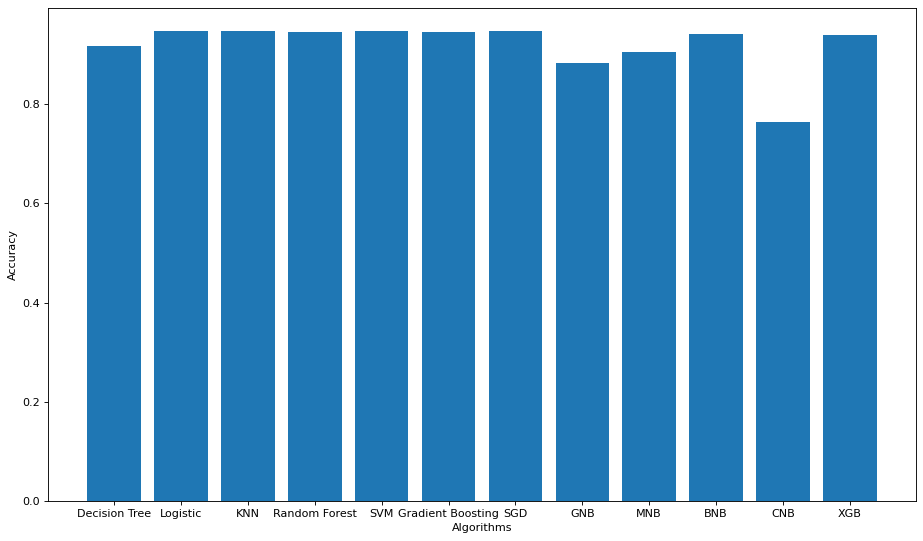

In [118]:
from matplotlib.pyplot import figure
figure(figsize=(14, 8), dpi=80)
algorithms = ['Decision Tree','Logistic','KNN','Random Forest','SVM','Gradient Boosting','SGD','GNB','MNB','BNB','CNB','XGB']
accuracy = [ac_dt,ac_lr,ac_knn,ac_rf,ac_sv,ac_gb,ac_sgd,ac_gnb,ac_mnb,ac_bnb,ac_cnb,ac_xgb]
plt.bar(algorithms,accuracy)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
# for i, v in enumerate(accuracy):
#     plt.text(i-.25, 
#               v/accuracy[i]+100, 
#               accuracy[i], 
#               fontsize=18, 
             
plt.show()

In [119]:
Y_pred_dt.max()


1

In [120]:
print(Y_pred_dt.max(),
Y_pred_sv.max(),
Y_pred_rf.max(),
Y_pred_lr.max(),
Y_pred_knn.max(),
 Y_pred_gb.max(),
 Y_pred_sgd.max(),
 Y_pred_gnb.max(),
Y_pred_mnb.max(),
 Y_pred_bnb.max(),
 Y_pred_cnb.max(),
 Y_pred_xgb.max(),)

1 0 1 0 1 1 0 1 1 1 1 1


In [121]:
Y_pred_knn.max()

1

In [122]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [123]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [124]:
import numpy as np
testtt = np.array([[0,44.0,0,0,1,0,1,85.28,26.200000,0]])

In [125]:
print(lr.predict(testtt))
print(sv.predict(testtt))
print(dt.predict(testtt))
print(rf.predict(testtt))
print(knn.predict(testtt))
print(gb.predict(testtt))
print(sgd.predict(testtt))
print(gnb.predict(testtt))
print(mnb.predict(testtt))
print(bnb.predict(testtt))
print(cnb.predict(testtt))
print(xgb.predict(testtt))


[1]
[0]
[1]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[0]


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ComplementNB was fitted with feature names
  warnings.warn(
